In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


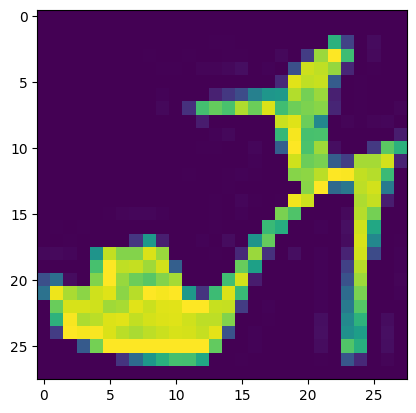

In [ ]:
plt.imshow(x_train[9])


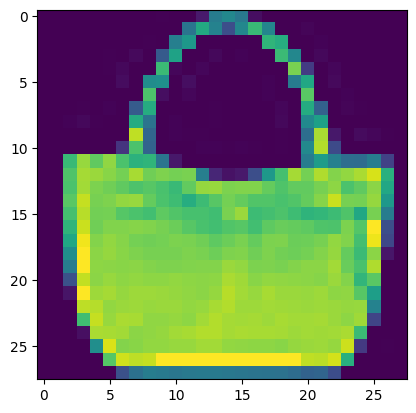

In [ ]:
plt.imshow(x_train[100])


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
x_train.shape


(60000, 28, 28, 1)

In [ ]:
x_test.shape


(10000, 28, 28, 1)

In [ ]:
y_train.shape


(60000,)

In [ ]:
y_test.shape


(10000,)

In [ ]:
model = keras.Sequential([
keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(64, (3,3), activation='relu'),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(128, (3,3), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.25),
keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 75s 39ms/step - loss: 0.5762 - accuracy: 0.7857 - val_loss: 0.3993 - val_accuracy: 0.8467
Epoch 2/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3784 - accuracy: 0.8610 - val_loss: 0.3253 - val_accuracy: 0.8829
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3255 - accuracy: 0.8814 - val_loss: 0.2931 - val_accuracy: 0.8921
Epoch 4/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2992 - accuracy: 0.8898 - val_loss: 0.2691 - val_accuracy: 0.8982
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2782 - accuracy: 0.8969 - val_loss: 0.2756 - val_accuracy: 0.8990
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2650 - accuracy: 0.9020 - val_loss: 0.2663 - val_accuracy: 0.9003
Epoch 7/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2524 - accuracy: 0.9051 - val_loss: 0.2501 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 [==============================] - 3s 11ms/step - loss: 0.2511 - accuracy: 0.9083


In [ ]:
print('Test accuracy:', test_acc)


Test accuracy: 0.90829998254776
